In [18]:
### IMPORT LIBRARIES ###
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

os.chdir('../')
from module import libgen, libnc4
os.chdir('./driver')

In [14]:
### GET A FILEPATH FOR A NETCDF FILE ###
file_path = '../data/cld30.nc4'

### OPEN THE NETCDF FILE ###
dataset = nc.Dataset(file_path, 'r')

### PRINT THE FILE AND VARIABLE INFORMATION ###
print("file information:")
print(dataset)
print("\nVariables:")
for variable in dataset.variables:
    print(variable)

file information:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dx: 70.0
    dy: 70.0
    dimensions(sizes): XDIM(400), YDIM(400), ZDIM(130)
    variables(dimensions): float32 DZ(ZDIM), float32 ZC(ZDIM), float32 XYZ_NDC(ZDIM, YDIM, XDIM), float32 XYZ_LWC(ZDIM, YDIM, XDIM)
    groups: 

Variables:
DZ
ZC
XYZ_NDC
XYZ_LWC


In [15]:
### GET A VARIABLE FROM THE NETCDF FILE ###
var_name = 'XYZ_NDC'
# var_name = 'XYZ_LWC'
# var_name = 'DZ'
# var_name = 'ZC'
data = dataset.variables[var_name][:]

### PRINT THE VARIABLE DATA ###
print(f"{var_name}:")
print(data)

### SHOW TEH SHAPE OF THE VARIABLE DATA ###
print(f"\nShape of the data: {data.shape}")

XYZ_NDC:
[[[0.04762401 0.11453942 0.04131066 ... 0.96400845 0.7349134  0.5623038 ]
  [0.22742106 0.08928248 0.00976946 ... 0.7594236  0.789446   0.5574993 ]
  [0.58433104 0.02588938 0.04288033 ... 0.43655515 0.51038074 0.8415864 ]
  ...
  [0.12099581 0.12504226 0.11293051 ... 0.90382046 0.6789461  0.50027907]
  [0.18736362 0.317053   0.29276174 ... 0.8852363  0.67413163 0.7787872 ]
  [0.58690006 0.34662318 0.18816008 ... 0.8674206  0.5970936  0.70765615]]

 [[0.08435567 0.1143568  0.03785878 ... 0.98944193 0.746498   0.5567267 ]
  [0.23070948 0.10251001 0.0109051  ... 0.94224674 0.82804495 0.5914926 ]
  [0.60964155 0.03789567 0.06304056 ... 0.4346779  0.5681257  0.86434597]
  ...
  [0.14050739 0.1089206  0.11729746 ... 0.96158046 0.6657522  0.5170112 ]
  [0.17183399 0.31586143 0.29802588 ... 0.8842265  0.6359953  0.72087127]
  [0.5447495  0.34197438 0.1763783  ... 0.8441401  0.60623825 0.54910856]]

 [[0.09750382 0.06443097 0.03565272 ... 0.9502927  0.7680693  0.44212136]
  [0.2465254 

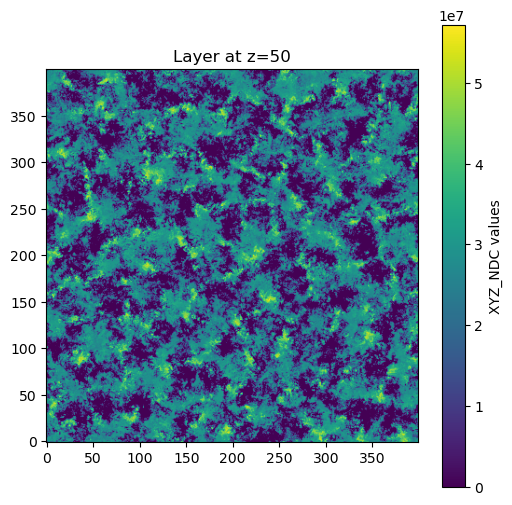

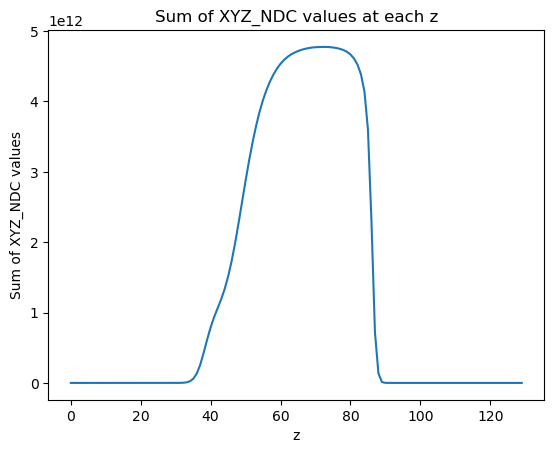

In [19]:
### PLOT A SLICE OF THE DATA ###
# libnc4.plot_slice_at_z(dataset, 'XYZ_LWC', 80)
# libnc4.plot_sum(dataset, 'XYZ_LWC')

libnc4.plot_slice_at_z(dataset, 'XYZ_NDC', 50)
libnc4.plot_sum(dataset, 'XYZ_NDC')

In [20]:
### CLOSE THE NETCDF FILE ###
dataset.close()